# Exploratory Data Analysis (EDA) Breast Cancer Dataset

# Haberman's Survival Data Set
#### Survival of patients who had undergone surgery for breast cancer

##### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Haberman Dataset: [https://www.kaggle.com/gilsousa/habermans-survival-data-set#haberman.csv]

About this file
	1.	Title: Haberman's Survival Data 
	2.	Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999 
	3.	Past Usage:
        a.	Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
        b.	Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
        c.	Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
	4.	Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 
	5.	Number of Instances: 306 
	6.	Number of Attributes: 4 (including the class attribute) 
	7.	Attribute Information:
        a.	Age of patient at time of operation (numerical)
        b.	Patient's year of operation (year - 1900, numerical)
        c.	Number of positive axillary nodes detected (numerical)
        d.	Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
	8.	Missing Attribute Values: None

In [1]:
#importing required libraries and loading the Haberman data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set'''
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("./Datasets/haberman.csv", names=['Age', 'Op_Year', 'Axil_nodes', 'Survival_Status'])


In [2]:
# checking the number of data-points and features
print (haberman.shape)

(306, 4)


In [3]:
# Features of the dataset
print (haberman.columns)

Index(['Age', 'Op_Year', 'Axil_nodes', 'Survival_Status'], dtype='object')


In [4]:
print (haberman.head())

   Age  Op_Year  Axil_nodes  Survival_Status
0   30       64           1                1
1   30       62           3                1
2   30       65           0                1
3   31       59           2                1
4   31       65           4                1


In [5]:
haberman.tail()

,Age,Op_Year,Axil_nodes,Survival_Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [6]:
# Unique class labels
print(list(haberman['Survival_Status'].unique()))

[1, 2]


In [7]:
# Data points for each class

haberman["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

The dataset is imbalanced where 26% could not survived after Surgery

In [8]:
haberman.describe()

,Age,Op_Year,Axil_nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
# Mapping labels 1 to 'survived' and 2 to 'not_Survived'
haberman["Survival_Status"]=haberman["Survival_Status"].map({1:'survived',2:'not_Survived'})

In [10]:
haberman["Survival_Status"].value_counts(normalize= True)

survived        0.735294
not_Survived    0.264706
Name: Survival_Status, dtype: float64

In [11]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
Op_Year            306 non-null int64
Axil_nodes         306 non-null int64
Survival_Status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


There are no Null values in this dataset

In [12]:
haberman.describe()

,Age,Op_Year,Axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


The maximum Axillary nodes found were 52 where average Axil_nodes were 4.02, that means there is an outlier in Axil_nodes which has to be dealt during Modeling for classification

# 2-D Scatter Plot

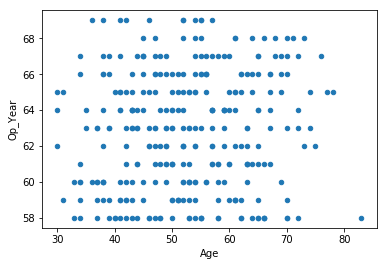

In [13]:
#2-D scatter plot:

haberman.plot(kind='scatter', x='Age', y='Op_Year') ;
plt.show()


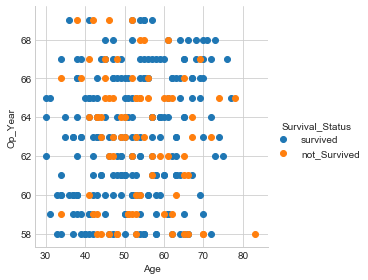

In [14]:
# 2-D Scatter plot with color-coding for each type/class.
# Using seaborn(sns)

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Age", "Op_Year") \
   .add_legend();
plt.show();


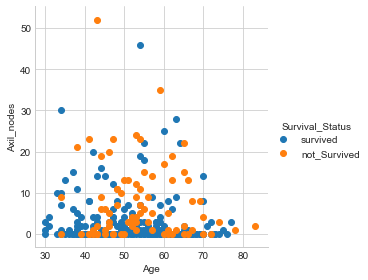

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Age", "Axil_nodes") \
   .add_legend();
plt.show();

**Observation(s):**
    Seperating survived from non-survived is much harder as they have considerable overlap.

#  Pair-plot

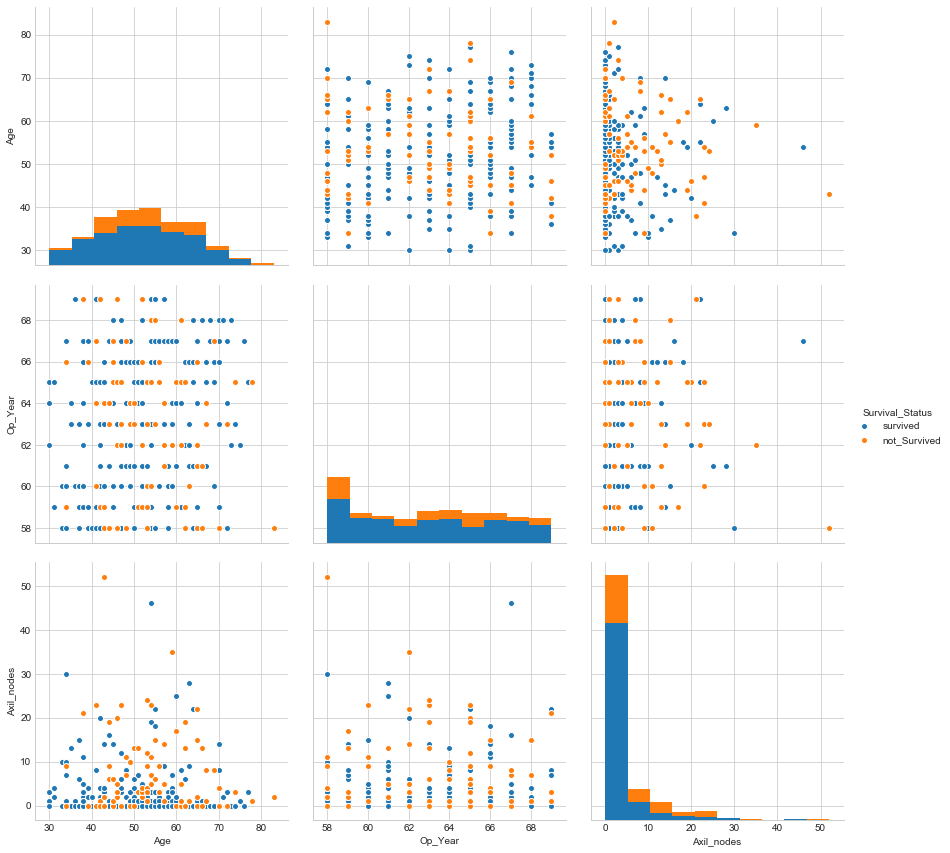

In [16]:
# pairwise scatter plot: Pair-Plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status", size=4);
plt.show()


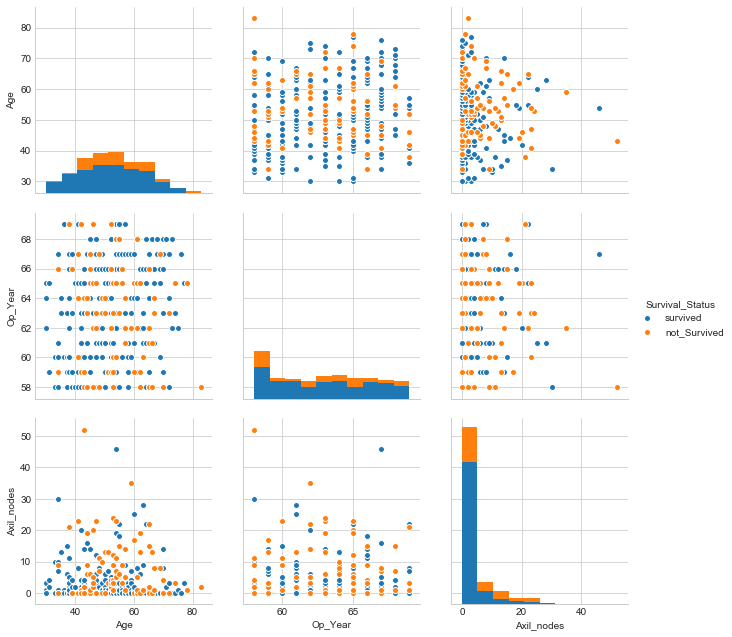

In [17]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='Survival_Status', vars=['Age', 'Op_Year', 'Axil_nodes'], size=3)
plt.show()

**Observations**
    Almost not possible to linearly seperable as both class labels are overlapped

# Plotting 1D - scatter plot

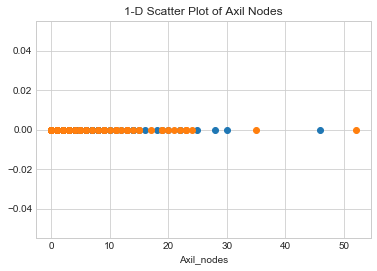

In [18]:
# 1-D scatter plot using just one feature(Axil_nodes)

import numpy as np
survived = haberman.loc[haberman["Survival_Status"] == 'survived'];
not_survived = haberman.loc[haberman["Survival_Status"] == 'not_Survived'];

plt.plot(survived["Axil_nodes"], np.zeros_like(survived["Axil_nodes"]), 'o')
plt.plot(not_survived["Axil_nodes"], np.zeros_like(not_survived["Axil_nodes"]), 'o')

plt.title("1-D Scatter Plot of Axil Nodes")
plt.xlabel('Axil_nodes')

plt.show()


Highly overlapping points observed from 1D scatter plot, cannot infer things

## PDF
    Probability Density Function is a function of a continuous random variable, whose integral across an interval gives the probability that the value of the variable lies within the same interval.
    Probality Density Function (PDF) is the probabilty that the variable takes a value x
    Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1
       Here the height of the bar denotes the percentage of data points under the corresponding group

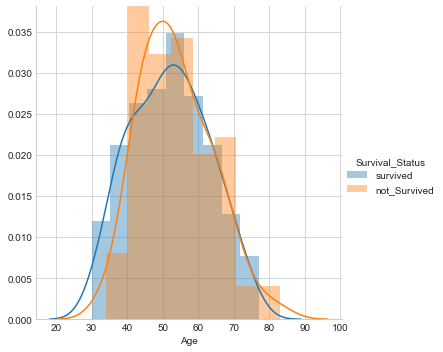

In [21]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Age",hist=True,kde=True) \
   .add_legend();
plt.show();



1. As per the above pdf, both the survived and non-survived people probabilities are overlapped so its difficult to seperate both with if conditions
2. Both type of people are having high density at age around 50-55 years

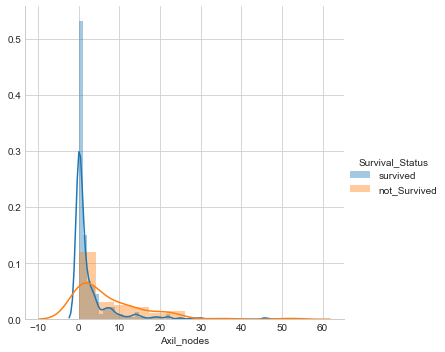

In [22]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Axil_nodes") \
   .add_legend();
plt.show();

***observations***
    probability of survival is more for Axil_nodes<10

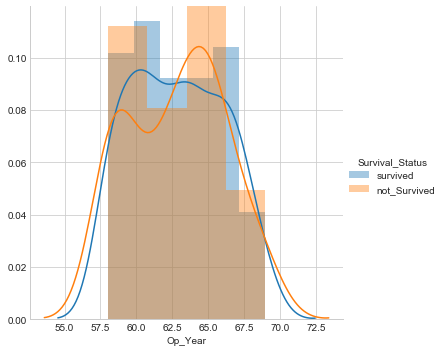

In [23]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Op_Year",hist=True,kde=True) \
   .add_legend();
plt.show();

1. Both the graphs are highly overlapped
2. Number of deaths were more during 63-65 years

In [24]:
haberman.head()

,Age,Op_Year,Axil_nodes,Survival_Status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


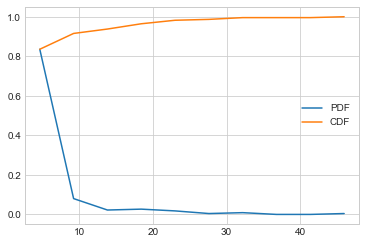

In [33]:

# Cumulative Distribution Function (CDF)
# The cumulative distribution function (cdf) is the probability that the variable takes a value 
# less than or equal to x.

#Plotting CDF of Axil_nodes
counts, bin_edges = np.histogram(survived['Axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF');
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend(loc='right')
plt.show();


<b>Observations:</b> People with Axial_nodes less than 20 have 98% chance of surviving.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


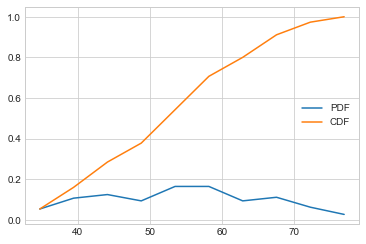

In [32]:
#Plotting CDF of Age

counts, bin_edges = np.histogram(survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend(loc='right')


plt.show();

<b>Observations: </b> People who Aged less than 65 have around 90% of survival chances

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


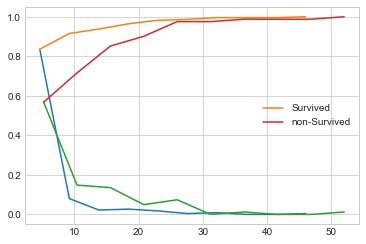

In [29]:
# Survived
counts, bin_edges = np.histogram(survived['Axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf, label='Survived')


# not Survived
counts, bin_edges = np.histogram(not_survived['Axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf, label='non-Survived')
plt.legend()


plt.show();

People with Axial nodes greater than 35 has almost no chance of surviving

In [34]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(survived["Age"]))
#Mean with an outlier.
print(np.mean(np.append(survived["Age"],50)));
print(np.mean(not_survived["Age"]))

print("\nStd-dev:");
print(np.std(survived["Age"]))
print(np.std(not_survived["Age"]))


Means:
52.01777777777778
52.008849557522126
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


In [35]:
#Median, Quantiles, Percentiles, IQR and MAD.
print("\nMedians:")
print(np.median(survived["Axil_nodes"]))
#Median with an outlier
print(np.median(np.append(survived["Axil_nodes"],50)));
print(np.median(not_survived["Axil_nodes"]))

print("\nQuantiles:")
print(np.percentile(survived["Axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["Axil_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survived["Axil_nodes"],90))
print(np.percentile(not_survived["Axil_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived["Axil_nodes"]))
print(robust.mad(not_survived["Axil_nodes"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


In [36]:
survived.shape

(225, 4)

In [37]:
survived.head()

,Age,Op_Year,Axil_nodes,Survival_Status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [38]:
not_survived.head()

,Age,Op_Year,Axil_nodes,Survival_Status
7,34,59,0,not_Survived
8,34,66,9,not_Survived
24,38,69,21,not_Survived
34,39,66,0,not_Survived
43,41,60,23,not_Survived


In [39]:
survived.iloc[112]

Age                      52
Op_Year                  62
Axil_nodes                0
Survival_Status    survived
Name: 151, dtype: object

In [40]:
print("\nMedians:")
print(np.median(survived["Age"]))
#Median with an outlier
print(np.median(np.append(survived["Age"],50)));
print(np.median(not_survived["Age"]))

print("\nQuantiles:")
print(np.percentile(survived["Age"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["Age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survived["Age"],90))
print(np.percentile(not_survived["Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived["Age"]))
print(robust.mad(not_survived["Age"]))




Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


In [41]:
print("\nMedians:")
print(np.median(survived["Op_Year"]))
#Median with an outlier
print(np.median(np.append(survived["Op_Year"],50)));
print(np.median(not_survived["Op_Year"]))

print("\nQuantiles:")
print(np.percentile(survived["Op_Year"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["Op_Year"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survived["Op_Year"],90))
print(np.percentile(not_survived["Op_Year"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived["Op_Year"]))
print(robust.mad(not_survived["Op_Year"]))


Medians:
63.0
63.0
63.0

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
4.447806655516806
4.447806655516806


# Box plot and Whiskers

 A Box Plot is the visual representation of the statistical five number summary of a given data set.
 Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
 The Concept of median, percentile, quantile.
 How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
 IQR like idea.

NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
Whiskers in the plot below donot correposnd to the min and max values.

<img src="https://chartio.com/images/tutorials/box-plot/boxplot1.png">

    Above image taken from chartio.com

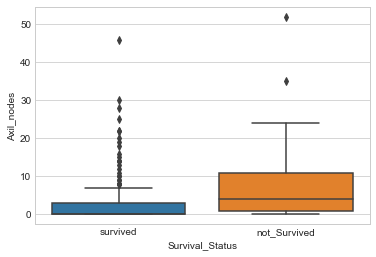

In [43]:

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Survival_Status',y='Axil_nodes', data=haberman)
plt.show()

Boxplot of 'Survived' had 75th percentile value at Axil_nodes is 2 and the 25th and 50th percentiles are overlapped
Boxplot of 'not Survived' had 25th percentile value at Axil_nodes is 1, 50th percentile value at axil_nodes is 3 and 75th percentile value at axil_nodes is 11

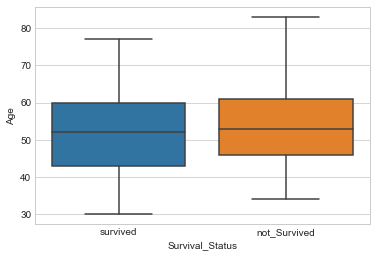

In [34]:
sns.boxplot(x='Survival_Status',y='Age', data=haberman)
plt.show()

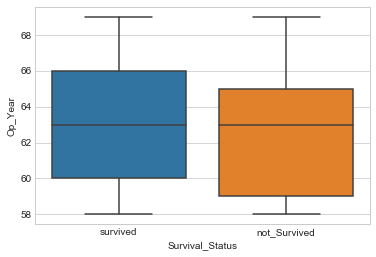

In [35]:
sns.boxplot(x='Survival_Status',y='Op_Year', data=haberman)
plt.show()

# Visualising through Violin plots

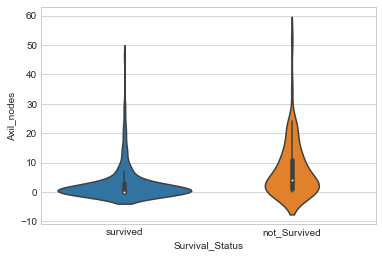

In [36]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Survival_Status", y="Axil_nodes", data=haberman, size=8)
plt.show()

Violin plot of survivors at 50th percentile have 0 positive nodes, at 75th percentie survivors have less than 3 positive axilary nodes
Violin plot of non-survivors at 25th percentile have 1 positive axilary node, at 50th percentile have positive axilary nodes below 4, and at 75th percentile have positive nodes below 11

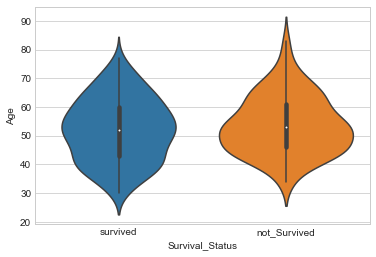

In [37]:
sns.violinplot(x="Survival_Status", y="Age", data=haberman, size=8)
plt.show()

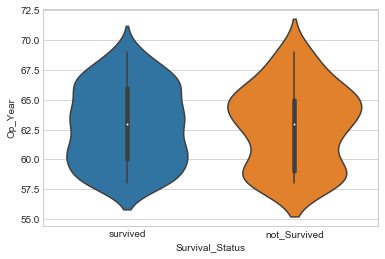

In [38]:
sns.violinplot(x="Survival_Status", y="Op_Year", data=haberman, size=8)
plt.show()

In the above plot, as per 75th percentiles of both the plots we can conclude that the percentage of survivals are greater for the operations done after 1965


In [39]:
# mapping back 'survived' to 1 and 'non_survived' to 2

haberman["Survival_Status"]=haberman["Survival_Status"].map({'survived':1,'not_Survived':2})

# Contour Plots
A contour plot is a graphical technique for representing a 3-dimensional surface by plotting constant z slices, called contours, on a 2-dimensional format. That is, given a value for z, lines are drawn for connecting the (x,y) coordinates where that z value occurs.
To draw the contour line for a certain z value, we connect all the (x, y) pairs, which produce the value z

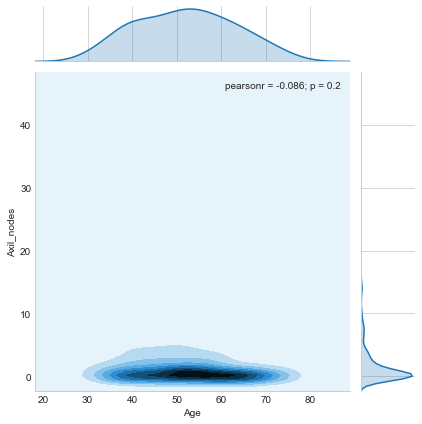

In [44]:
#2D Density plot, contors-plot

sns.jointplot(x="Age", y="Axil_nodes", data=survived, kind="kde");
plt.show();

The above Contour density plot tells that people with Axial_nodes<5 and of age<60 has more chances of Survival 

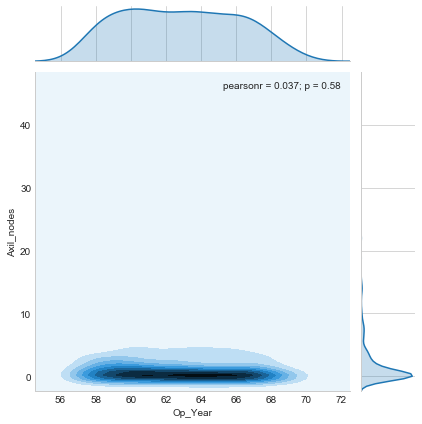

In [41]:
#2D Density plot, contors-plot

sns.jointplot(x="Op_Year", y="Axil_nodes", data=survived, kind="kde");
plt.show();


1. The above Contour density plot tells that people who had with Axial_nodes<5 has more chances of Survival and that most of the surgeries of survivours were noted ro be done between years 1960-1966
2. Plot is more dense for Years 60-66 and for axial_nodes<3

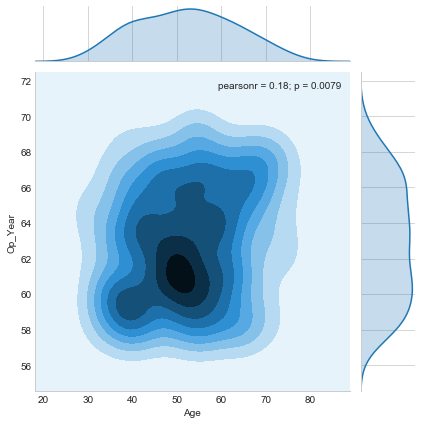

In [42]:
#2D Density plot, contors-plot

sns.jointplot(x="Age", y="Op_Year", data=survived, kind="kde");
plt.show();


Most of the survivors are of age 48-55 yrs and most of the successful operations were done during 1960-63 yrs

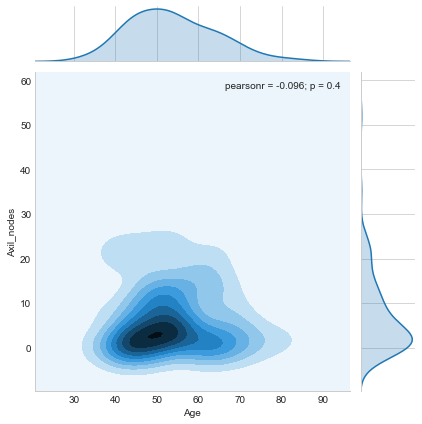

In [43]:
#2D Density plot, contors-plot

sns.jointplot(x="Age", y="Axil_nodes", data=not_survived, kind="kde");
plt.show();


Most of the non survivors are of age 45-55 yrs with axil_nodes atleast 6

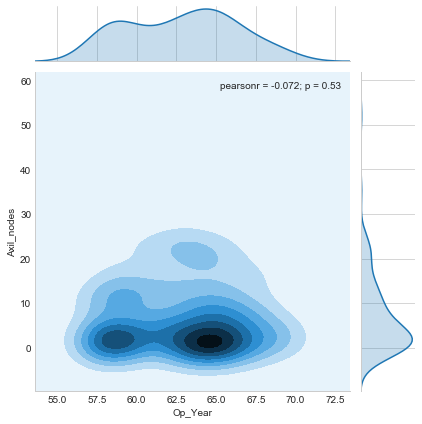

In [44]:
#2D Density plot, contors-plot

sns.jointplot(x="Op_Year", y="Axil_nodes", data=not_survived, kind="kde");
plt.show();


Two denser parts are observed for non survivors between operation years 1958-60 and between 1964-66 with axial_nodes 3-7.

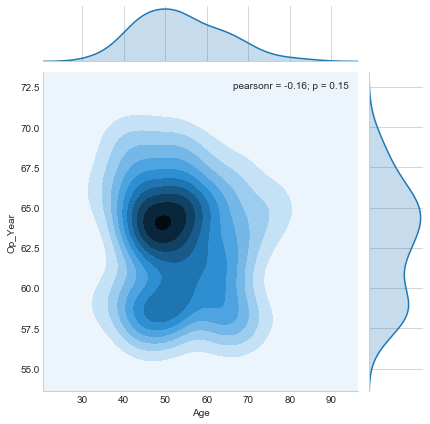

In [45]:
#2D Density plot, contors-plot

sns.jointplot(x="Age", y="Op_Year", data=not_survived, kind="kde");
plt.show();


Most of the non-survivors fall between age 46-56 years whose operations were done between years 1963-65

# Summary:

1. Downloaded Haberman Cancer Survival dataset from Kaggle.(https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Performed visual anlaysis on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Perform Univaraite analysis(PDF, CDF, Boxplot, Violin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

## Conclusions

1. Overlapped class labels of survival and non-survivals were observed,there is no clear seperation observed.
2. Younger Age and less number of Axillary nodes had more survivals
3. Most of the survivors had axillary nodes less than 10 and age less than 35
4. 26% of people could not survive 5 years after the Operation
5. The percentage of survivals were seen greater for those who have done operations after 1965
